## Sujet
Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities. **You would like to use this data to help you select which city to expand
to next**
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city.

### Loading and ploting data


In [51]:
data = load('ex1data1.txt'); % read comma separated data
X = data(:, 1); 
y = data(:, 2);
m = length(y);




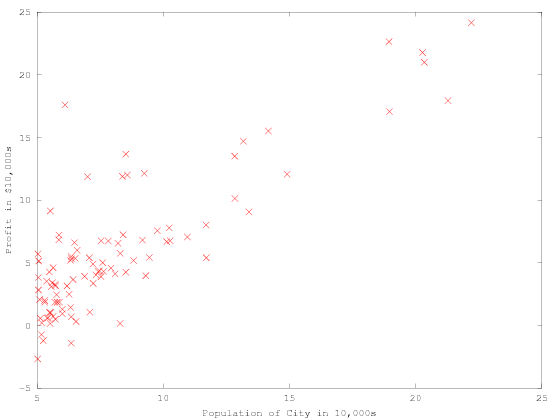

In [52]:
plot(X, y, 'rx');
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');

## Computing the cost
The objective of linear regression is to minimize the cost function:
![optional caption text](J.png)


### Initialisation
we add another dimension to our data to accommodate the θ0 intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01

In [33]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1);         % initialize fitting parameters Theta 0 et Theta 1 = 0

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

### Cost function

In [34]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y
% Initialize some useful values
m = length(y); % number of training examples

J = 1 / (2 * m) * sum(((X * theta) - y) .^ 2);
end

## Gradient descent
![optional caption text](rep.png)

In [35]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

    for iter = 1:num_iters

        t1 = theta(1) - alpha * (1 / m) * sum(((X * theta) - y) .* X(:, 1));
        t2 = theta(2) - alpha * (1 / m) * sum(((X * theta) - y) .* X(:, 2));

        % Feed our new theta values before computing cost.
        % Not done inline 
        theta(1) = t1;
        theta(2) = t2;

        % Save the cost J in every iteration    
        J_history(iter) = computeCost(X, y, theta);

    end

end

### Test the gradient descent

In [36]:
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);

Theta found by gradient descent:
-3.630291
1.166362


### Ploting the resulting model

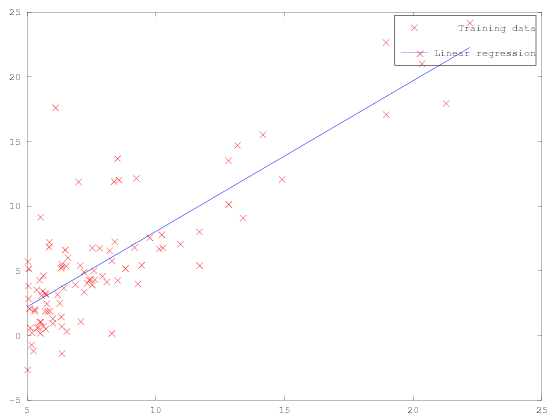

In [46]:
plot(X(:,2), y, 'rx');  %take the second column as we have added a extra one
hold on;
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')


### Use the model to predict something

In [48]:
% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n', predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n', predict2*10000);


For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


### Visualizing J(θ)
![optional caption text](der.png)

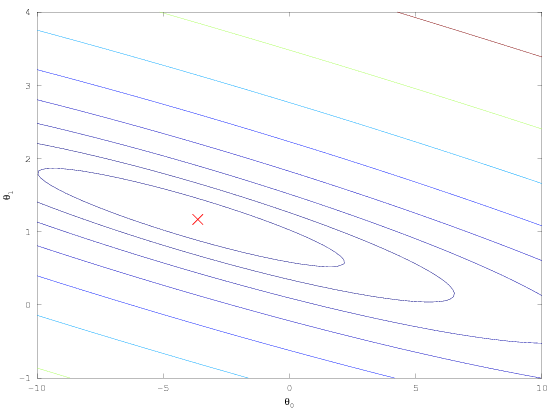

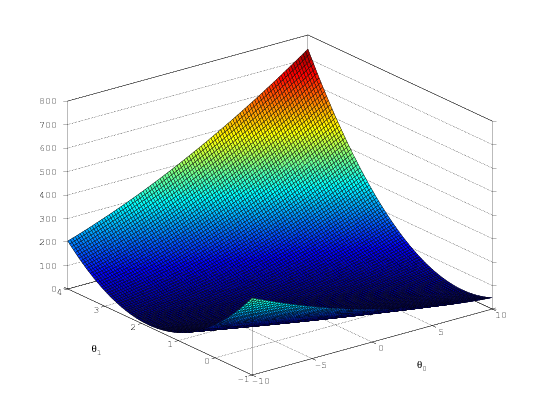

In [49]:

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);